# ML lab 07-1 : training/test dataset

In [23]:
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()

X = tf.compat.v1.placeholder("float", [None, 3])
Y = tf.compat.v1.placeholder("float", [None, 3])
W = tf.Variable(tf.compat.v1.random_normal([3, 3]))
b = tf.Variable(tf.compat.v1.random_normal([3]))

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.compat.v1.log(hypothesis), axis=1))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.compat.v1.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.compat.v1.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], 
                                      feed_dict={X: x_data, Y:y_data})
        print(step, cost_val, W_val)
    #predict
    print("Prediction: " , sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y:y_test}))

0 2.4771018 [[ 0.2588254  -0.8864358   1.2786201 ]
 [-0.4221642   1.4180804  -0.22544551]
 [ 0.60493547 -0.23061971  0.14869812]]
1 1.720816 [[ 0.26130575 -0.9228073   1.3125112 ]
 [-0.3151875   1.2199693  -0.134311  ]
 [ 0.67885846 -0.3822365   0.2263919 ]]
2 1.5414147 [[ 0.2427518  -0.9344143   1.3426722 ]
 [-0.3021563   1.129327   -0.05670002]
 [ 0.6585438  -0.42729008  0.29176012]]
3 1.4811418 [[ 0.21960859 -0.9341952   1.3655963 ]
 [-0.32062086  1.1009871  -0.00989551]
 [ 0.6105078  -0.41346112  0.32596722]]
4 1.4584863 [[ 2.0512703e-01 -9.3433505e-01  1.3802177e+00]
 [-3.0007416e-01  1.0702096e+00  3.3518951e-04]
 [ 6.0432106e-01 -4.0280896e-01  3.2150176e-01]]
5 1.43731 [[ 0.18955891 -0.93190724  1.393358  ]
 [-0.28647882  1.0535309   0.0034185 ]
 [ 0.5919626  -0.37921578  0.3102671 ]]
6 1.4166007 [[ 0.17474473 -0.93021494  1.40648   ]
 [-0.26963937  1.0326343   0.00747573]
 [ 0.58314943 -0.35995257  0.29981706]]
7 1.3962818 [[ 0.15975398 -0.9281821   1.4194379 ]
 [-0.25441223  

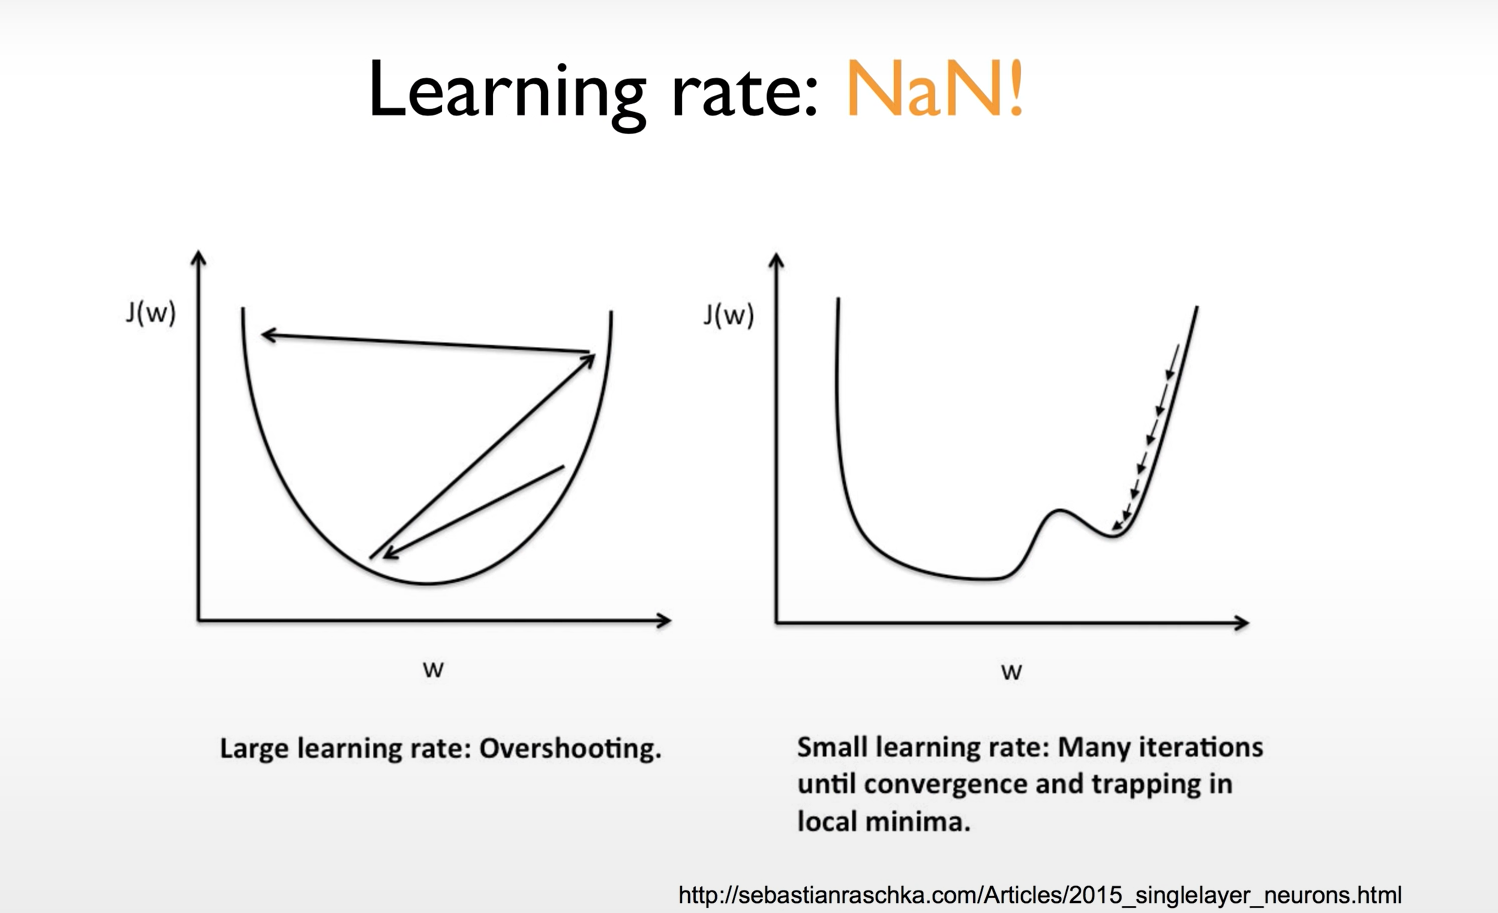

learning_rate 이 너무 크면? 기울기를 구해서 얼마만큼 스텝을 움직일까에 대한것임. 너무 작으면? 더디게 움직여서 학습이 안되기도 함.

In [26]:
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()

X = tf.compat.v1.placeholder("float", [None, 3])
Y = tf.compat.v1.placeholder("float", [None, 3])
W = tf.Variable(tf.compat.v1.random_normal([3, 3]))
b = tf.Variable(tf.compat.v1.random_normal([3]))
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.compat.v1.log(hypothesis), axis=1))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.compat.v1.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.compat.v1.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], 
                                      feed_dict={X: x_data, Y:y_data})
        print(step, cost_val, W_val)
    #predict
    print("Prediction: " , sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y:y_test}))

0 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
1 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
2 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
3 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
4 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
5 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
6 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.9905083  -2.2196405  -0.08406448]]
7 2.688665 [[-1.3158318   0.7777984  -1.0848851 ]
 [-1.2474443   0.6209967  -0.33107135]
 [ 0.990

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973], 
              [823.02002, 929.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
xy = MinMaxScaler(xy)
print(xy)
# x_data = xy[:, 0:-1]
# y_data = xy[:, [-1]]

# #placeholders for a tensor that will be always fed.
# X = tf.compat.v1.placeholder(tf.float32, shape=[None, 4])
# Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1])
# W = tf.Variable(tf.compat.v1.random_normal([4, 1]), name='weight')
# b = tf.Variable(tf.compat.v1.random_normal([1]), name='bias')

# hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
# cost = tf.reduce_mean(tf.square(hypothesis - Y))
# # minimize
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-5)
# train = optimizer.minimize(cost)

# sess = tf.compat.v1.Session()
# sess.run(tf.compat.v1.global_variables_initializer())
# for step in range(2001):
#     cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
#                                       feed_dict={X: x_data, Y:y_data})
#     print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

ModuleNotFoundError: No module named 'sklearn'